## **Imports**

In [1]:
import json
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from utils import preprocess

## **Apply Models**

### Load Model & Label Mapping

In [2]:
# Change the path to the model you want to have a look
MODEL_PATH = '../src/models/resNet50/model_v_resNet50_1.1.keras'

# Change the path to teh label mapping belonging to the model
LABEL_MAPPING_PATH = '../src/models/resNet50/label_mapping__resNet50_1.1.json'

with open(LABEL_MAPPING_PATH, 'r') as file:
    label_mapping = json.load(file)

model = tf.keras.models.load_model(MODEL_PATH)
print(model.summary())
print(label_mapping)

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1_conv[0][0]                 
_______________________________________________________________________________________

### Apply Model On Unseen Image

In [6]:
IMG_HEIGHT = 128
IMG_WIDTH = 128
IMG_PATH = "../src/unseen_images/BMW_1Series/im04964-3-bmw-1er-reihe.webp"

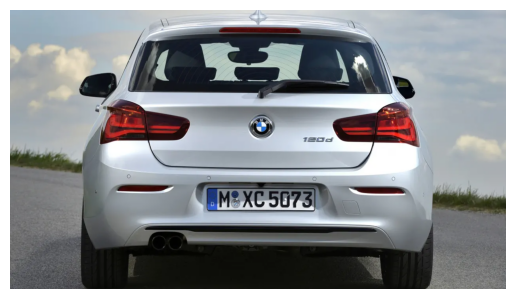

In [7]:
img = mpimg.imread(IMG_PATH)
plt.imshow(img)
plt.axis('off')
plt.show()

In [8]:
img = preprocess(IMG_PATH, IMG_HEIGHT, IMG_WIDTH)
predictions = model.predict(img)

label_mapping[str(np.argmax(predictions))]

'1 Series'